<a href="https://colab.research.google.com/github/MojtabaHeidari/MHM/blob/main/Wine_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [1]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

     |████████████████████████████████| 301 kB 31.3 MB/s 
     |████████████████████████████████| 16.8 MB 852 kB/s 
     |████████████████████████████████| 116 kB 57.9 MB/s 
     |████████████████████████████████| 2.0 MB 54.8 MB/s 
     |████████████████████████████████| 261 kB 72.4 MB/s 
     |████████████████████████████████| 56 kB 6.3 MB/s 
     |████████████████████████████████| 1.3 MB 48.8 MB/s 
     |████████████████████████████████| 6.8 MB 60.7 MB/s 
     |████████████████████████████████| 88 kB 9.7 MB/s 
     |████████████████████████████████| 167 kB 71.4 MB/s 
     |████████████████████████████████| 1.7 MB 63.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 636 kB 72.2 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 3.1 MB 67.5 MB/s 
     |███████████████████

In [2]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


Read file

In [5]:
#read cvs file into dataframe
df = pd.read_csv('Wine7.csv')
df.head(25)

Class  Alcohol  Alcalinity of ash  Total phenols  Flavanoids  \
0       1    14.23               15.6           2.80        3.06   
1       1    13.20               11.2           2.65        2.76   
2       1    13.16               18.6           2.80        3.24   
3       1    14.37               16.8           3.85        3.49   
4       1    13.24               21.0           2.80        2.69   
5       1    14.20               15.2           3.27        3.39   
6       1    14.39               14.6           2.50        2.52   
7       1    14.06               17.6           2.60        2.51   
8       1    14.83               14.0           2.80        2.98   
9       1    13.86               16.0           2.98        3.15   
10      1    14.10               18.0           2.95        3.32   
11      1    14.12               16.8           2.20        2.43   
12      1    13.75               16.0           2.60        2.76   
13      1    14.75               11.4           3.10        3.69   
14      1    14.38               12.0           3.30        3.64   
15      1    13.63               17.2           2.85        2.91   
16      1    14.30               20.0           2.80        3.14   
17      1    13.83               20.0           2.95        3.40   
18      1    14.19               16.5           3.30        3.93   
19      1    13.64               15.2           2.70        3.03   
20      1    14.06               16.0           3.00        3.17   
21      1    12.93               18.6           2.41        2.41   
22      1    13.71               16.6           2.61        2.88   
23      1    12.85               17.8           2.48        2.37   
24      1    13.50               20.0           2.53        2.61   

    Color intensity   Hue  Proline  
0              5.64  1.04     1065  
1              4.38  1.05     1050  
2              5.68  1.03     1185  
3              7.80  0.86     1480  
4              4.32  1.04      735  
5              6.75  1.05     1450  
6              5.25  1.02     1290  
7              5.05  1.06     1295  
8              5.20  1.08     1045  
9              7.22  1.01     1045  
10             5.75  1.25     1510  
11             5.00  1.17     1280  
12             5.60  1.15     1320  
13             5.40  1.25     1150  
14             7.50  1.20     1547  
15             7.30  1.28     1310  
16             6.20  1.07     1280  
17             6.60  1.13     1130  
18             8.70  1.23     1680  
19             5.10  0.96      845  
20             5.65  1.09      780  
21             4.50  1.03      770  
22             3.80  1.11     1035  
23             3.93  1.09     1015  
24             3.52  1.12      845

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Class              178 non-null    int64  
 1   Alcohol            178 non-null    float64
 2   Alcalinity of ash  178 non-null    float64
 3   Total phenols      178 non-null    float64
 4   Flavanoids         178 non-null    float64
 5   Color intensity    178 non-null    float64
 6   Hue                178 non-null    float64
 7   Proline            178 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 11.2 KB


In [7]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [8]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

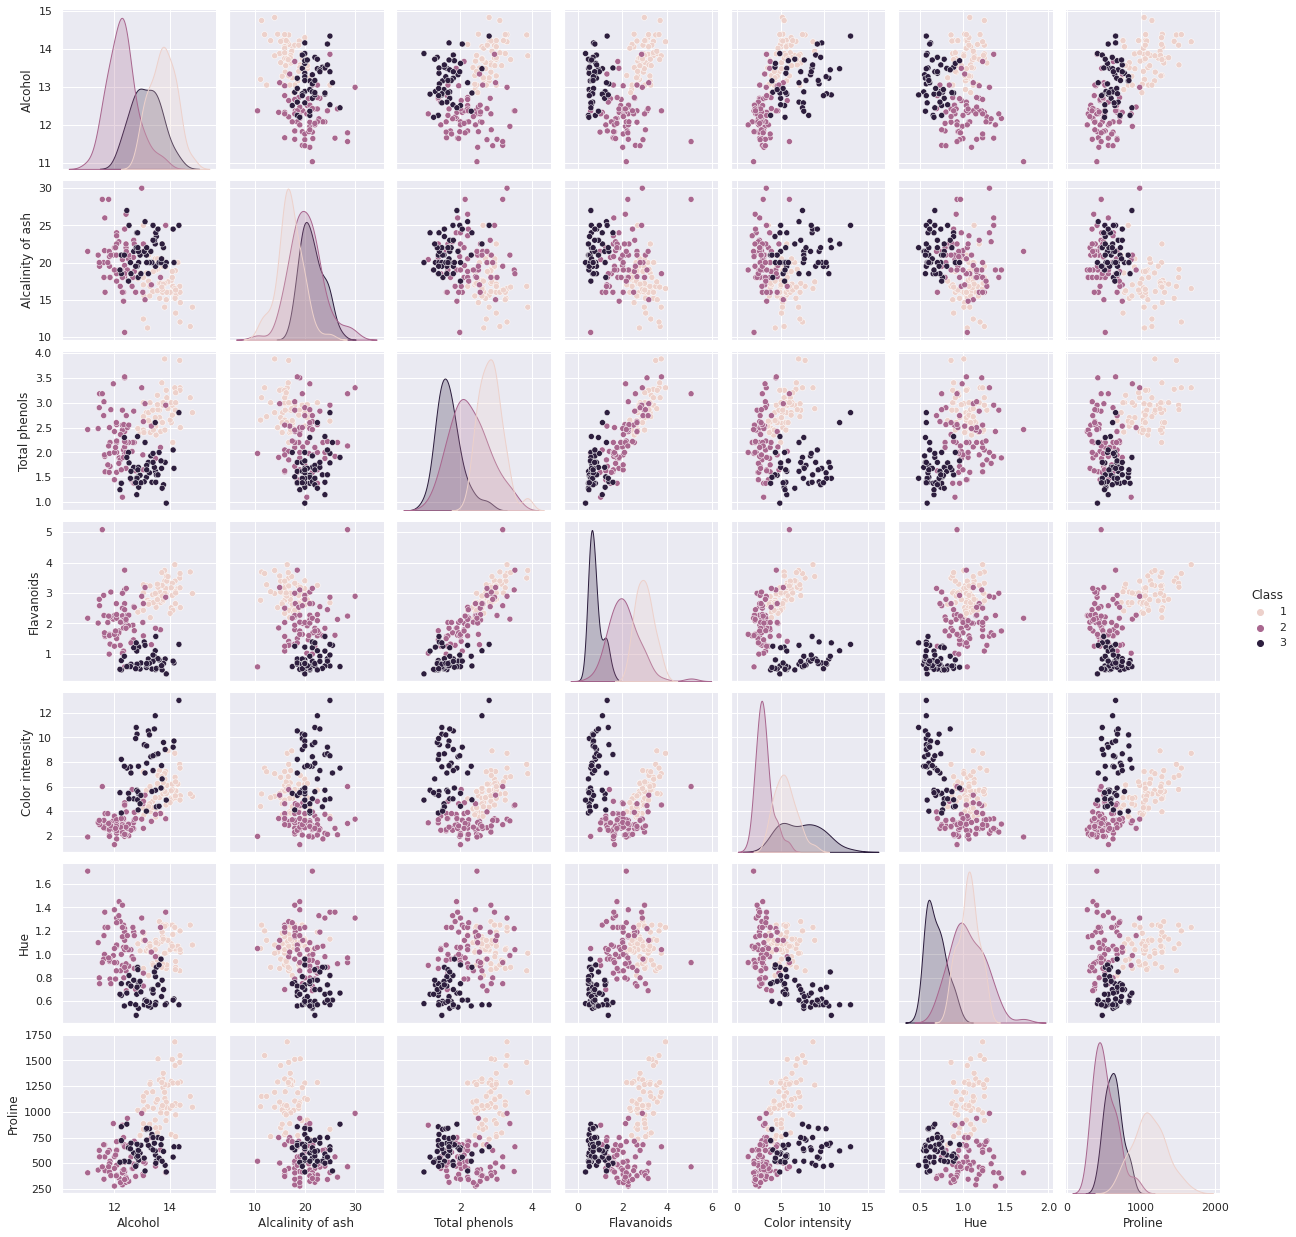

In [9]:
sns.pairplot(df, hue='Class')
plt.show()

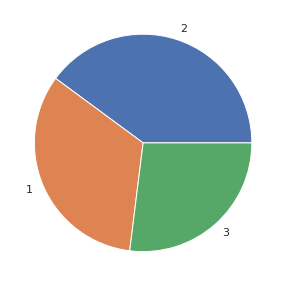

In [10]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [11]:
X = df.drop(columns=['Class'])
X.head(10)

Alcohol  Alcalinity of ash  Total phenols  Flavanoids  Color intensity  \
0    14.23               15.6           2.80        3.06             5.64   
1    13.20               11.2           2.65        2.76             4.38   
2    13.16               18.6           2.80        3.24             5.68   
3    14.37               16.8           3.85        3.49             7.80   
4    13.24               21.0           2.80        2.69             4.32   
5    14.20               15.2           3.27        3.39             6.75   
6    14.39               14.6           2.50        2.52             5.25   
7    14.06               17.6           2.60        2.51             5.05   
8    14.83               14.0           2.80        2.98             5.20   
9    13.86               16.0           2.98        3.15             7.22   

    Hue  Proline  
0  1.04     1065  
1  1.05     1050  
2  1.03     1185  
3  0.86     1480  
4  1.04      735  
5  1.05     1450  
6  1.02     1290  
7  1.06     1295  
8  1.08     1045  
9  1.01     1045

In [12]:
X.describe().transpose()

count        mean         std     min       25%      50%  \
Alcohol            178.0   13.000618    0.811827   11.03   12.3625   13.050   
Alcalinity of ash  178.0   19.494944    3.339564   10.60   17.2000   19.500   
Total phenols      178.0    2.295112    0.625851    0.98    1.7425    2.355   
Flavanoids         178.0    2.029270    0.998859    0.34    1.2050    2.135   
Color intensity    178.0    5.058090    2.318286    1.28    3.2200    4.690   
Hue                178.0    0.957449    0.228572    0.48    0.7825    0.965   
Proline            178.0  746.893258  314.907474  278.00  500.5000  673.500   

                        75%      max  
Alcohol             13.6775    14.83  
Alcalinity of ash   21.5000    30.00  
Total phenols        2.8000     3.88  
Flavanoids           2.8750     5.08  
Color intensity      6.2000    13.00  
Hue                  1.1200     1.71  
Proline            985.0000  1680.00

**Standardize the Data**

In [13]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Alcohol  Alcalinity of ash  Total phenols  Flavanoids  Color intensity  \
0  1.518613          -1.169593       0.808997    1.034819         0.251717   
1  0.246290          -2.490847       0.568648    0.733629        -0.293321   
2  0.196879          -0.268738       0.808997    1.215533         0.269020   
3  1.691550          -0.809251       2.491446    1.466525         1.186068   
4  0.295700           0.451946       0.808997    0.663351        -0.319276   
5  1.481555          -1.289707       1.562093    1.366128         0.731870   
6  1.716255          -1.469878       0.328298    0.492677         0.083015   
7  1.308617          -0.569023       0.488531    0.482637        -0.003499   
8  2.259772          -1.650049       0.808997    0.954502         0.061386   
9  1.061565          -1.049479       1.097417    1.125176         0.935177   

        Hue   Proline  
0  0.362177  1.013009  
1  0.406051  0.965242  
2  0.318304  1.395148  
3 -0.427544  2.334574  
4  0.362177 -0.037874  
5  0.406051  2.239039  
6  0.274431  1.729520  
7  0.449924  1.745442  
8  0.537671  0.949319  
9  0.230557  0.949319

In [14]:
X.describe().transpose()

count          mean       std       min       25%  \
Alcohol            178.0 -8.619821e-16  1.002821 -2.434235 -0.788245   
Alcalinity of ash  178.0 -1.160121e-16  1.002821 -2.671018 -0.689137   
Total phenols      178.0 -2.972030e-16  1.002821 -2.107246 -0.885468   
Flavanoids         178.0 -4.016762e-16  1.002821 -1.695971 -0.827539   
Color intensity    178.0 -1.122697e-17  1.002821 -1.634288 -0.795103   
Hue                178.0  3.717376e-16  1.002821 -2.094732 -0.767562   
Proline            178.0 -7.484650e-18  1.002821 -1.493188 -0.784638   

                        50%       75%       max  
Alcohol            0.061000  0.836129  2.259772  
Alcalinity of ash  0.001518  0.602088  3.154511  
Total phenols      0.095960  0.808997  2.539515  
Flavanoids         0.106150  0.849085  3.062832  
Color intensity   -0.159225  0.493956  3.435432  
Hue                0.033127  0.713164  3.301694  
Proline           -0.233720  0.758249  2.971473

**Observations and variables**

In [15]:
observations = list(df.index)
variables = list(df.columns)
print (variables)

['Class', 'Alcohol', 'Alcalinity of ash', 'Total phenols', 'Flavanoids', 'Color intensity', 'Hue', 'Proline']


**Box and Whisker Plots**

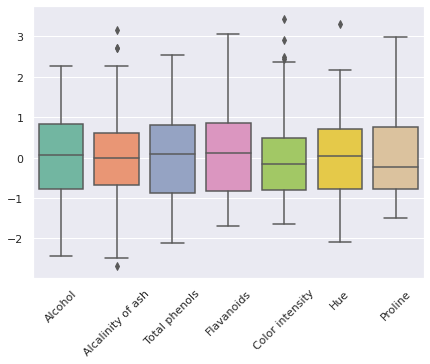

In [16]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

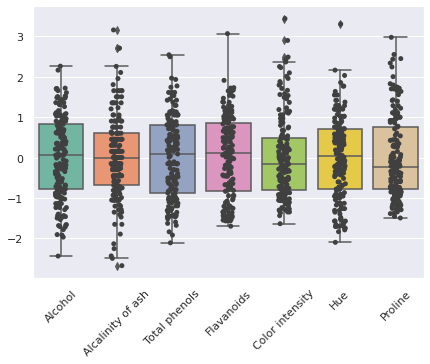

In [17]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

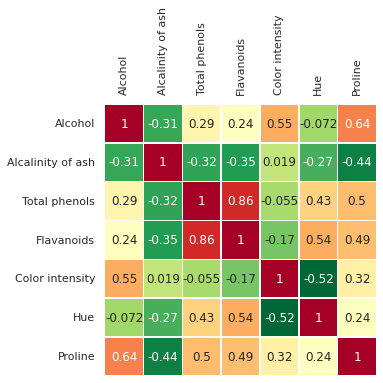

In [18]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

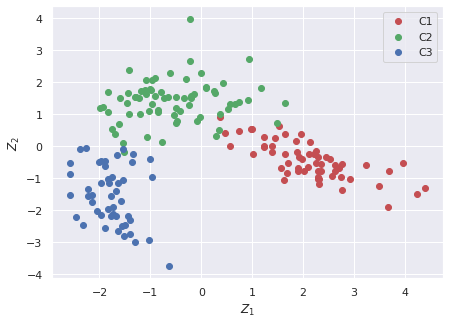

In [19]:
pca = PCA()
Z = pca.fit_transform(X)


idx_C1 = np.where(y == 1)
idx_C2 = np.where(y == 2)
idx_C3 = np.where(y == 3)

plt. figure()
plt.scatter(Z[idx_C1,0], Z[idx_C1,1], c='r', label='C1')
plt.scatter(Z[idx_C2,0], Z[idx_C2,1], c='g', label='C2')
plt.scatter(Z[idx_C3,0], Z[idx_C3,1], c='b', label='C3')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

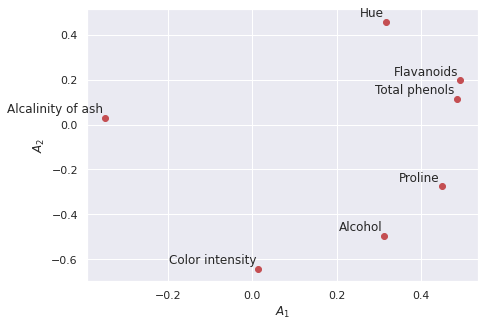

In [20]:
A = pca.components_.T 

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(X,A[:,0],A[:,1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


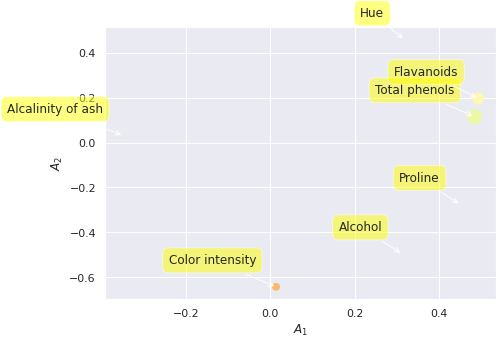

In [21]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(X,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

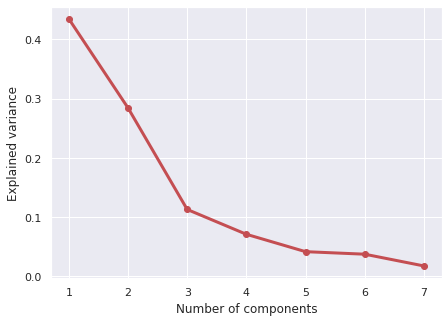

In [22]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

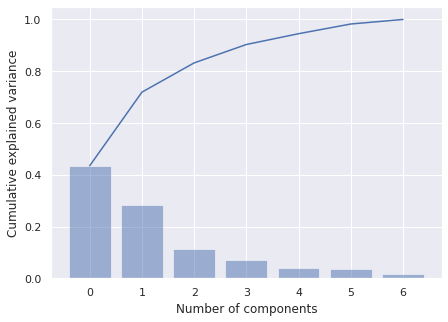

In [23]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

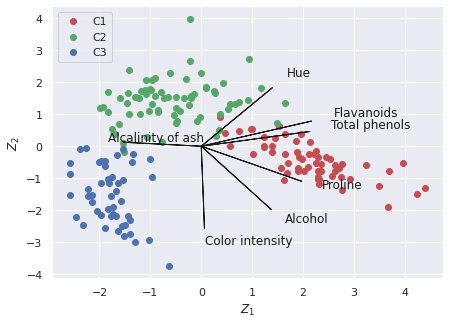

In [24]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
A3 = A[:,2]
Z1 = Z[:,0] 
Z2 = Z[:,1]
Z3 = Z[:,2]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i+1], color='k')

plt.scatter(Z[idx_C1,0], Z[idx_C1,1], c='r', label='C1')
plt.scatter(Z[idx_C2,0], Z[idx_C2,1], c='g', label='C2')
plt.scatter(Z[idx_C3,0], Z[idx_C3,1], c='b', label='C3')
plt.legend(loc='upper left')

##**Using PCA Library**

In [25]:
!pip install pca

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=deef1a75ce33f4c434eca7ae124c7ee19398b76f5335ffe8b4e420c354b1a221
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [26]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [6] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [27]:
out['PC']

PC1       PC2       PC3       PC4       PC5       PC6
0    2.358122 -0.767373 -0.399665  0.023242  0.527290 -0.056314
1    2.139605  0.119097 -1.738297  0.782389 -0.240223 -0.151492
2    1.878649 -0.184368  0.420775 -0.026619 -0.661279 -0.313315
3    3.671003 -1.890421  0.903357  0.614815 -0.263680 -0.539874
4    0.747718  0.473902  0.812462 -0.061031  0.406004 -0.024843
..        ...       ...       ...       ...       ...       ...
173 -1.447270 -2.188752 -0.275243 -0.174880  0.233908 -0.125130
174 -1.570181 -1.701893  0.410807 -0.464912 -0.001220 -0.172956
175 -1.513636 -2.804514 -0.214392  0.149996 -0.711260  0.333968
176 -1.495069 -2.467889 -0.250067  0.153264 -0.674388  0.108642
177 -1.631911 -2.630155  1.156405 -0.256434  0.770960  0.371214

[178 rows x 6 columns]

**Scatter plot**

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f57722c7910>)

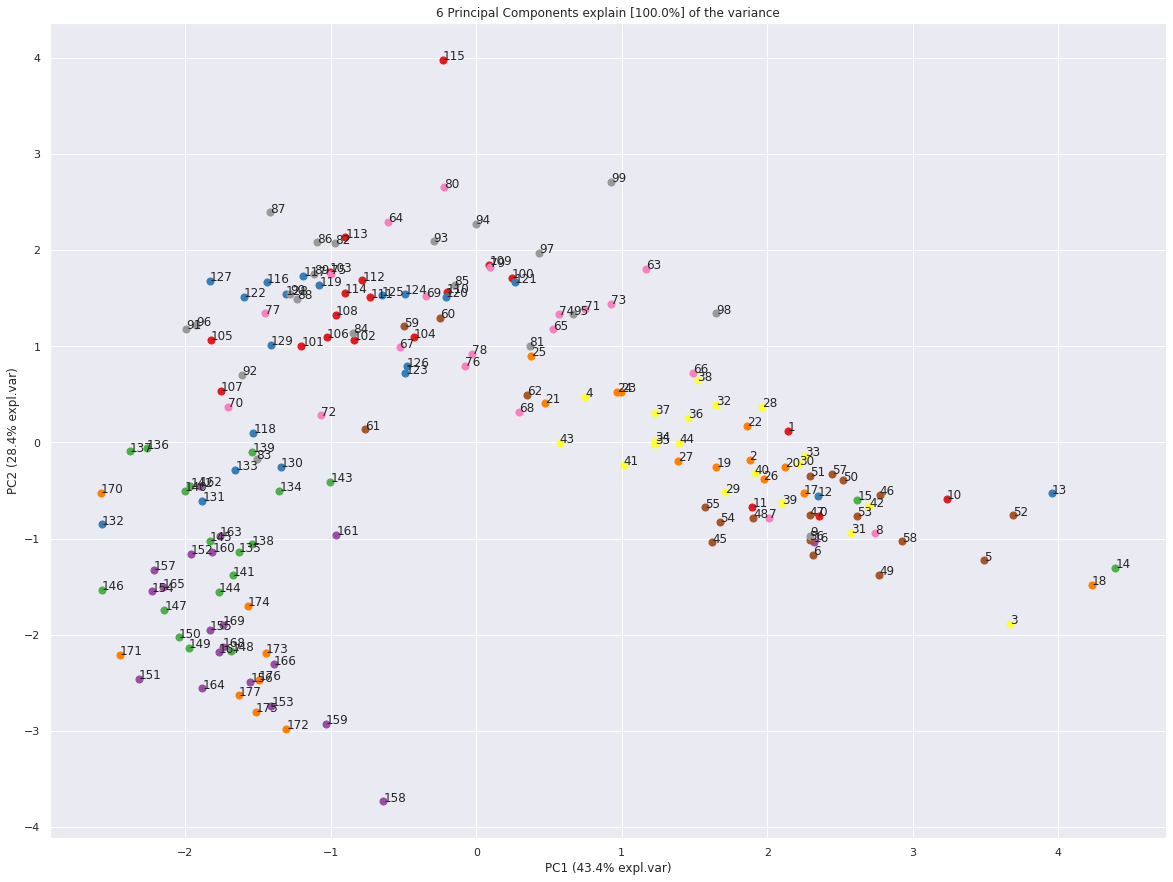

In [28]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [29]:
A = out['loadings'].T

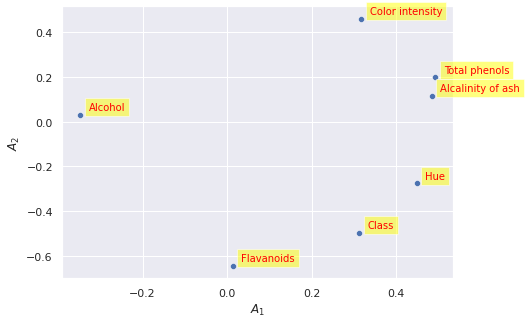

In [30]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

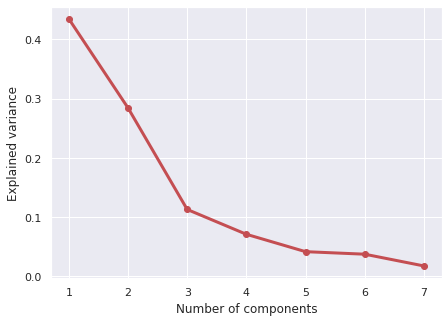

In [31]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

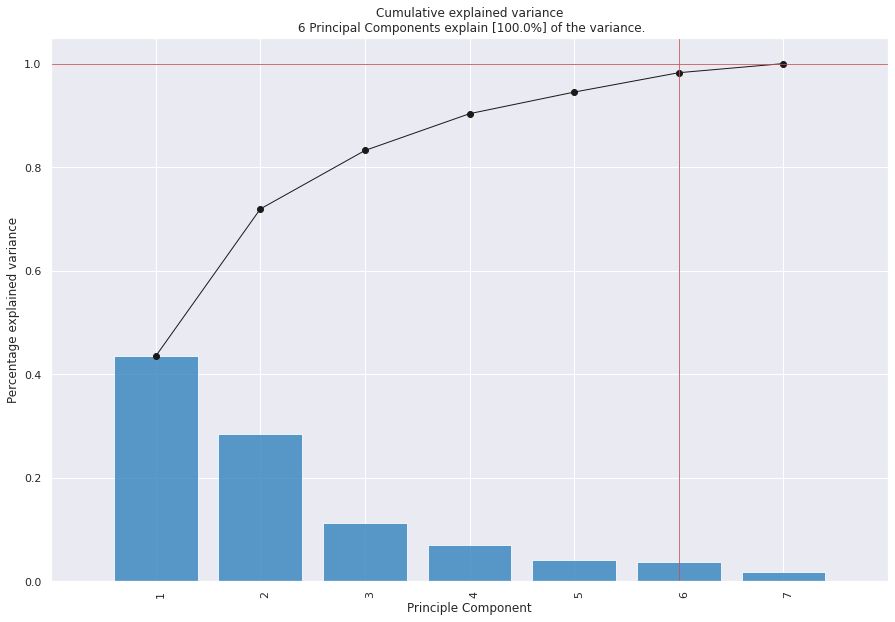

<Figure size 504x360 with 0 Axes>

In [32]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.


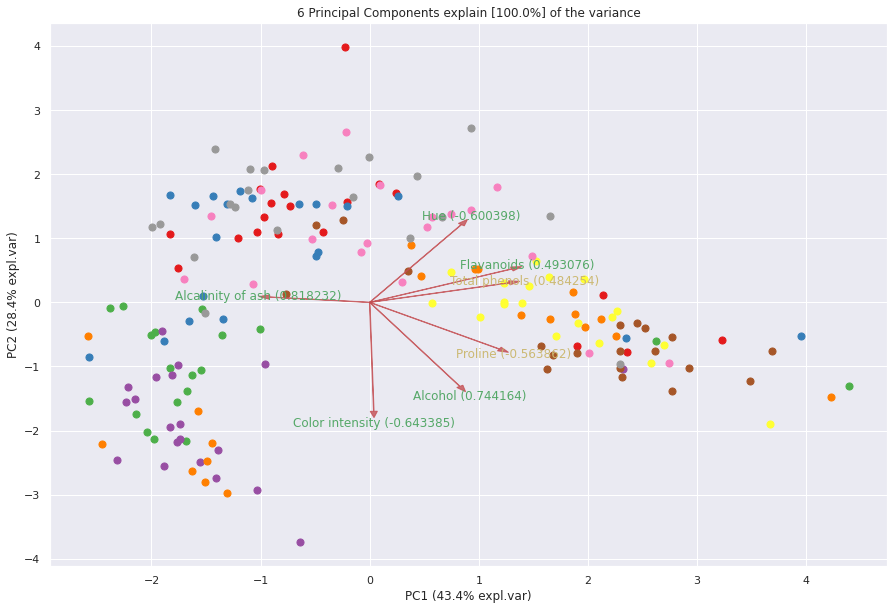

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f577a117390>)

In [33]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


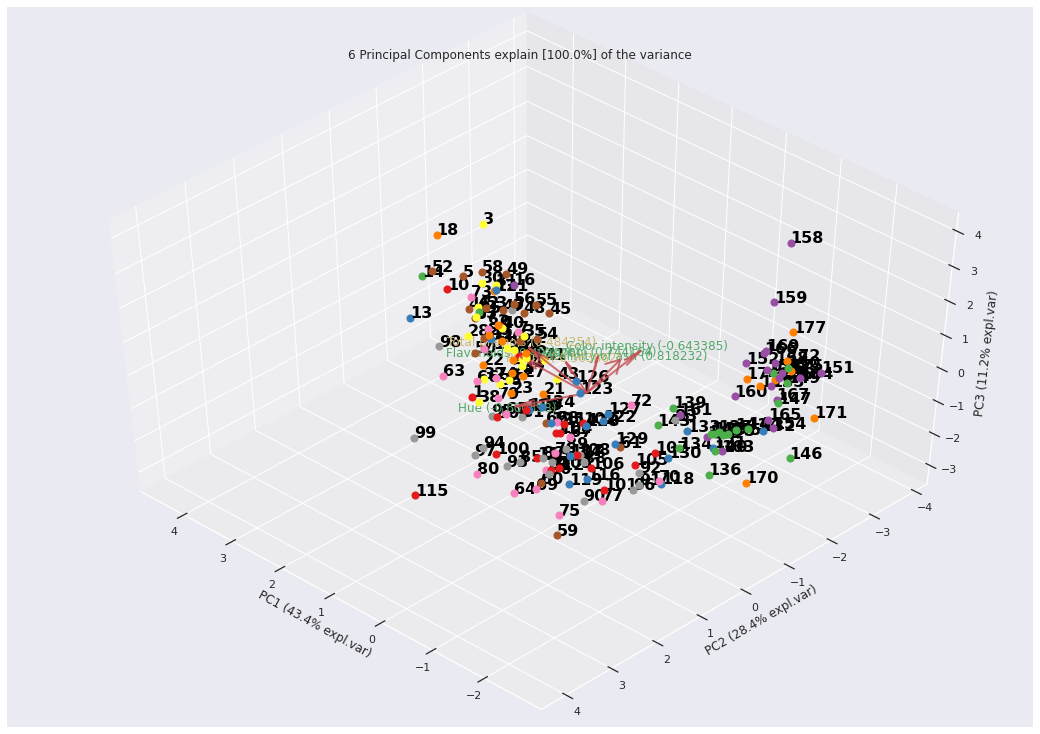

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f577a50b2d0>)

In [34]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [35]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 18 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 18 records were not available at the time when the machine learning experiment was performed.

In [36]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (160, 8)
Unseen Data For Predictions: (18, 8)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [37]:
from pycaret.classification import *
clf = setup(data=data, target='Class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             Class
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (160, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (111, 7)
12                    Transformed Test Set           (49, 7)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              9804
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (178, 8) means 178 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (160, 8) is transformed into (111, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 49 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [38]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    0.9909  1.0000  0.9917  0.9927   
nb                            Naive Bayes    0.9818  1.0000  0.9833  0.9855   
et                 Extra Trees Classifier    0.9818  1.0000  0.9806  0.9859   
qda       Quadratic Discriminant Analysis    0.9727  0.9987  0.9722  0.9786   
lightgbm  Light Gradient Boosting Machine    0.9727  0.9989  0.9750  0.9823   
ridge                    Ridge Classifier    0.9636  0.0000  0.9639  0.9709   
lda          Linear Discriminant Analysis    0.9545  0.9987  0.9528  0.9636   
gbc          Gradient Boosting Classifier    0.9455  0.9900  0.9444  0.9568   
lr                    Logistic Regression    0.9364  0.9948  0.9389  0.9468   
dt               Decision Tree Classifier    0.9273  0.9452  0.9294  0.9423   
ada                  Ada Boost Classifier    0.8727  0.9423  0.8722  0.8768   
knn                K Neighbors Classifier    0.6470  0.8400  0.6300  0.6205   
svm                   SVM - Linear Kernel    0.3856  0.0000  0.3833  0.2225   
dummy                    Dummy Classifier    0.3697  0.5000  0.3333  0.1376   

              F1   Kappa     MCC  TT (Sec)  
rf        0.9908  0.9862  0.9873     0.451  
nb        0.9815  0.9725  0.9747     0.012  
et        0.9814  0.9725  0.9747     0.398  
qda       0.9722  0.9587  0.9621     0.013  
lightgbm  0.9720  0.9596  0.9644     0.058  
ridge     0.9628  0.9448  0.9493     0.010  
lda       0.9533  0.9309  0.9365     0.012  
gbc       0.9442  0.9173  0.9240     0.189  
lr        0.9358  0.9041  0.9096     0.453  
dt        0.9258  0.8900  0.8981     0.011  
ada       0.8594  0.8109  0.8222     0.076  
knn       0.6244  0.4606  0.4731     0.110  
svm       0.2454  0.0804  0.1124     0.060  
dummy     0.2002  0.0000  0.0000     0.009

In [39]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.



There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [40]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.8182  0.8750  0.8333  0.8909  0.8106  0.7317  0.7695
2       0.8182  0.8542  0.8222  0.8182  0.8182  0.7179  0.7179
3       0.9091  0.9286  0.8889  0.9273  0.9051  0.8608  0.8721
4       0.9091  0.9375  0.9167  0.9318  0.9091  0.8642  0.8750
5       0.9091  0.9286  0.9167  0.9273  0.9076  0.8625  0.8735
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9091  0.9286  0.9167  0.9273  0.9076  0.8625  0.8735
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9273  0.9452  0.9294  0.9423  0.9258  0.8900  0.8981
SD      0.0680  0.0511  0.0654  0.0567  0.0695  0.1030  0.0964

In [41]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [42]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.8182  0.8750  0.8333  0.8909  0.8106  0.7317  0.7695
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.9091  0.9286  0.8889  0.9273  0.9051  0.8608  0.8721
4       0.9091  0.9375  0.9167  0.9318  0.9091  0.8642  0.8750
5       0.9091  1.0000  0.9167  0.9273  0.9076  0.8625  0.8735
6       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9545  0.9741  0.9556  0.9677  0.9532  0.9319  0.9390
SD      0.0610  0.0423  0.0585  0.0409  0.0631  0.0908  0.0800

In [43]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [44]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 11.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


How to analyze model performance using various plots

In [45]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [46]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8333  0.9688  0.8333  0.8500  0.8320  0.7500  0.7579
1       0.4545  0.6356  0.4444  0.4394  0.4312  0.1646  0.1713
2       0.5455  0.7670  0.5778  0.5227  0.5267  0.3125  0.3165
3       0.7273  0.8709  0.7222  0.7424  0.7273  0.5926  0.6000
4       0.7273  0.7881  0.6944  0.7182  0.7152  0.5823  0.5899
5       0.5455  0.7857  0.5278  0.5515  0.5411  0.3125  0.3165
6       0.8182  0.8750  0.8056  0.8182  0.8182  0.7250  0.7250
7       0.5455  0.8709  0.5000  0.4545  0.4909  0.2949  0.3118
8       0.6364  0.9334  0.6111  0.6273  0.6242  0.4430  0.4489
9       0.6364  0.9042  0.5833  0.4805  0.5372  0.4286  0.4930
Mean    0.6470  0.8400  0.6300  0.6205  0.6244  0.4606  0.4731
SD      0.1205  0.0924  0.1232  0.1451  0.1337  0.1861  0.1848

**Tune K Neighbors Model**

In [47]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8333  0.9896  0.8333  0.8667  0.8148  0.7500  0.7746
1       0.4545  0.5739  0.4444  0.4740  0.4287  0.1646  0.1817
2       0.8182  0.9280  0.8222  0.8409  0.8156  0.7179  0.7273
3       0.6364  0.9399  0.6389  0.7152  0.6558  0.4634  0.4811
4       0.6364  0.8490  0.6111  0.6364  0.6364  0.4500  0.4500
5       0.8182  0.9188  0.8333  0.8909  0.8106  0.7317  0.7695
6       0.6364  0.8466  0.6111  0.6364  0.6364  0.4500  0.4500
7       0.7273  0.9107  0.6944  0.7818  0.7020  0.5769  0.6013
8       0.8182  0.9586  0.8056  0.8182  0.8182  0.7250  0.7250
9       0.7273  0.9351  0.6944  0.8442  0.7125  0.5769  0.6390
Mean    0.7106  0.8850  0.6989  0.7505  0.7031  0.5606  0.5799
SD      0.1151  0.1119  0.1210  0.1263  0.1168  0.1756  0.1796

**Evaluate K Neighbors Model**

In [48]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [49]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9091  1.0000  0.9167  0.9318  0.9091  0.8642  0.8750
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9091  1.0000  0.9167  0.9318  0.9091  0.8642  0.8750
5       0.9091  0.9740  0.9167  0.9273  0.9076  0.8625  0.8735
6       0.9091  1.0000  0.8889  0.9273  0.9051  0.8608  0.8721
7       0.8182  0.9740  0.8333  0.8182  0.8182  0.7250  0.7250
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.9091  1.0000  0.9167  0.9318  0.9091  0.8642  0.8750
Mean    0.9364  0.9948  0.9389  0.9468  0.9358  0.9041  0.9096
SD      0.0582  0.0104  0.0553  0.0541  0.0585  0.0879  0.0855

**Tune Logistic Regression Model**

In [50]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.7273  0.9383  0.6944  0.7182  0.7152  0.5823  0.5899
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.9091  1.0000  0.9167  0.9318  0.9091  0.8642  0.8750
5       0.9091  0.9740  0.9167  0.9273  0.9076  0.8625  0.8735
6       0.9091  1.0000  0.8889  0.9273  0.9051  0.8608  0.8721
7       0.9091  1.0000  0.9167  0.9273  0.9076  0.8625  0.8735
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9364  0.9912  0.9333  0.9432  0.9345  0.9032  0.9084
SD      0.0818  0.0193  0.0906  0.0823  0.0852  0.1251  0.1218

**Evaluate Logistic Regression Model**

In [51]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [52]:
rf = create_model('rf')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
1       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
2       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9091  1.0  0.9167  0.9273  0.9076  0.8625  0.8735
9       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9909  1.0  0.9917  0.9927  0.9908  0.9862  0.9873
SD      0.0273  0.0  0.0250  0.0218  0.0277  0.0412  0.0380

**Tune Random Forest Model**

In [53]:
tuned_rf = tune_model(rf)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9091  1.0  0.9167  0.9318  0.9091  0.8642  0.8750
2       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9909  1.0  0.9917  0.9932  0.9909  0.9864  0.9875
SD      0.0273  0.0  0.0250  0.0205  0.0273  0.0407  0.0375

**Evaluate Random Forest Model**

In [54]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9091  1.0  0.9167  0.9318  0.9091  0.8642  0.8750
2       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9909  1.0  0.9917  0.9932  0.9909  0.9864  0.9875
SD      0.0273  0.0  0.0250  0.0205  0.0273  0.0407  0.0375

In [ ]:
tuned_best_model

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [55]:
clf_pca = setup(data=data, target='Class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             Class
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (160, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (111, 3)
12                    Transformed Test Set           (49, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              d3ba
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [56]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
ridge                    Ridge Classifier    0.9818  0.0000  0.9833  0.9855   
et                 Extra Trees Classifier    0.9818  0.9974  0.9833  0.9859   
rf               Random Forest Classifier    0.9727  0.9974  0.9750  0.9791   
qda       Quadratic Discriminant Analysis    0.9727  0.9987  0.9750  0.9791   
lr                    Logistic Regression    0.9636  1.0000  0.9667  0.9718   
knn                K Neighbors Classifier    0.9636  1.0000  0.9656  0.9718   
nb                            Naive Bayes    0.9636  0.9987  0.9667  0.9718   
svm                   SVM - Linear Kernel    0.9636  0.0000  0.9667  0.9700   
lda          Linear Discriminant Analysis    0.9636  1.0000  0.9639  0.9709   
lightgbm  Light Gradient Boosting Machine    0.9636  0.9976  0.9667  0.9718   
ada                  Ada Boost Classifier    0.9455  0.9891  0.9472  0.9629   
gbc          Gradient Boosting Classifier    0.9371  0.9728  0.9389  0.9562   
dt               Decision Tree Classifier    0.9273  0.9455  0.9250  0.9435   
dummy                    Dummy Classifier    0.3697  0.5000  0.3333  0.1376   

              F1   Kappa     MCC  TT (Sec)  
ridge     0.9815  0.9725  0.9747     0.016  
et        0.9817  0.9727  0.9748     0.399  
rf        0.9726  0.9591  0.9623     0.486  
qda       0.9726  0.9591  0.9623     0.012  
lr        0.9633  0.9453  0.9497     0.023  
knn       0.9632  0.9450  0.9494     0.129  
nb        0.9633  0.9453  0.9497     0.019  
svm       0.9635  0.9455  0.9486     0.071  
lda       0.9628  0.9448  0.9493     0.014  
lightgbm  0.9633  0.9453  0.9497     0.028  
ada       0.9448  0.9180  0.9269     0.074  
gbc       0.9363  0.9055  0.9153     0.171  
dt        0.9262  0.8898  0.8974     0.018  
dummy     0.2002  0.0000  0.0000     0.010

In [57]:
best_model_pca

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)

**Tune the Best Model**

In [61]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
1       0.9091  0.9756  0.9167  0.9318  0.9091  0.8642  0.8750
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9091  0.9740  0.9167  0.9273  0.9076  0.8625  0.8735
6       0.9091  1.0000  0.8889  0.9273  0.9051  0.8608  0.8721
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9091  1.0000  0.9167  0.9273  0.9076  0.8625  0.8735
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9636  0.9950  0.9639  0.9714  0.9629  0.9450  0.9494
SD      0.0445  0.0101  0.0449  0.0351  0.0454  0.0674  0.0620

In [62]:
tuned_best_model_pca

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [67]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 10.9 MB/s 


In [ ]:
import shap

In [ ]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.8881  0.8333  0.8980  0.8452  0.7812  0.8074
1       0.9286  0.9611  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  1.0000  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9231  1.0000  0.9333  0.9385  0.9231  0.8850  0.8929
6       0.8462  0.9487  0.8667  0.8974  0.8423  0.7719  0.8001
7       0.8462  0.9177  0.8500  0.8615  0.8462  0.7699  0.7768
8       0.9231  0.9786  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9247  0.9694  0.9250  0.9415  0.9229  0.8869  0.8961
SD      0.0583  0.0381  0.0588  0.0453  0.0602  0.0875  0.0798

In [ ]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8571  0.9254  0.8333  0.8980  0.8452  0.7812  0.8074
1       0.9286  0.9532  0.9333  0.9429  0.9286  0.8931  0.9000
2       0.9231  1.0000  0.9167  0.9385  0.9219  0.8839  0.8919
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       0.9231  1.0000  0.9333  0.9385  0.9231  0.8850  0.8929
6       0.8462  0.9904  0.8667  0.8974  0.8423  0.7719  0.8001
7       0.8462  0.9647  0.8500  0.8615  0.8462  0.7699  0.7768
8       0.9231  0.9915  0.9167  0.9385  0.9219  0.8839  0.8919
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9247  0.9825  0.9250  0.9415  0.9229  0.8869  0.8961
SD      0.0583  0.0247  0.0588  0.0453  0.0602  0.0875  0.0798

**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

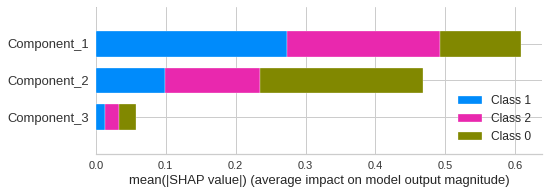

In [ ]:
interpret_model(tuned_rf_pca, plot='summary')

In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')